# SF Salaries Exercise 



** Import pandas as pd.**

In [1]:
import pandas as pd

** Read Salaries.csv as a dataframe called sal.**

In [2]:
sal = pd.read_csv('salaries.csv')

** Check the head of the DataFrame. **

In [3]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


** Use the .info() method to find out how many entries there are.**

In [4]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**What is the average BasePay ?**

In [5]:
sal['BasePay'].mean()

66325.44884050643

** What is the highest amount of OvertimePay in the dataset ? **

In [6]:
sal['OvertimePay'].max()

245131.88

** What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll). **

In [8]:
sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

** How much does JOSEPH DRISCOLL make (including benefits)? **

In [9]:
sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
24,25,JOSEPH DRISCOLL,"CAPTAIN, FIRE SUPPRESSION",140546.86,97868.77,31909.28,NaN,270324.91,270324.91,2011,NaN,San Francisco,NaN


In [10]:
sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL']['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

** What is the name of highest paid person (including benefits)?**

In [13]:
sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].max()]['EmployeeName']

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

** What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

his pay is negative

In [16]:
sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


In [17]:
sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].min()]['EmployeeName']

148653    Joe Lopez
Name: EmployeeName, dtype: object

** What was the average (mean) BasePay of all employees per year? (2011-2014) ? **

In [31]:
sal[(sal['Year'] >= 2011) & (sal['Year'] <= 2014)]['BasePay'].mean()

66325.44884050643

** How many unique job titles are there? **

In [32]:
sal['JobTitle'].nunique()

2159

** What are the top 5 most common jobs? **

In [34]:
sal['JobTitle'].value_counts()[:5]

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

** How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?) **

In [43]:
condition = sal[sal['Year'] == 2013]['JobTitle'].value_counts() == 1

In [49]:
sal[sal['Year'] == 2013]['JobTitle'].value_counts()[condition].count()

202

** How many people have the word Chief in their job title? (This is pretty tricky) **

In [64]:
sal[sal['JobTitle'].str.startswith('CHIEF')]['JobTitle'].count()

101

** Bonus: Is there a correlation between length of the Job Title string and Salary? **

In [68]:
sal['title_length'] = sal['JobTitle'].apply(len)

In [73]:
check_sal = sal[['title_length','TotalPayBenefits']]

In [86]:
check_sal.corr()

,title_length,TotalPayBenefits
title_length,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


In [87]:
import numpy as np

In [91]:
sigma = np.cov(check_sal['title_length'],check_sal['TotalPayBenefits'])[0,1]
sigma

-16749.243777151834

In [94]:
sigma = np.corrcoef(check_sal['title_length'],check_sal['TotalPayBenefits'])[0,1]
sigma

-0.03687844593260675

In [80]:
import matplotlib.pyplot as plt

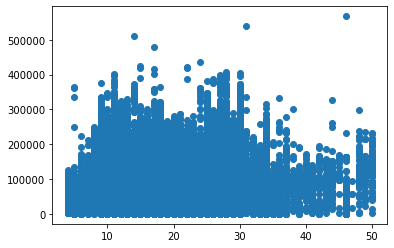

In [96]:
plt.scatter(x = check_sal['title_length'], y = check_sal['TotalPayBenefits'])

# Great Job!